In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt',header=None,sep='\s+')

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Ruchi\AppData\Local\Temp\ipykernel_19144\415885508.py:4: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt',header=None,sep='\s+')


In [4]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


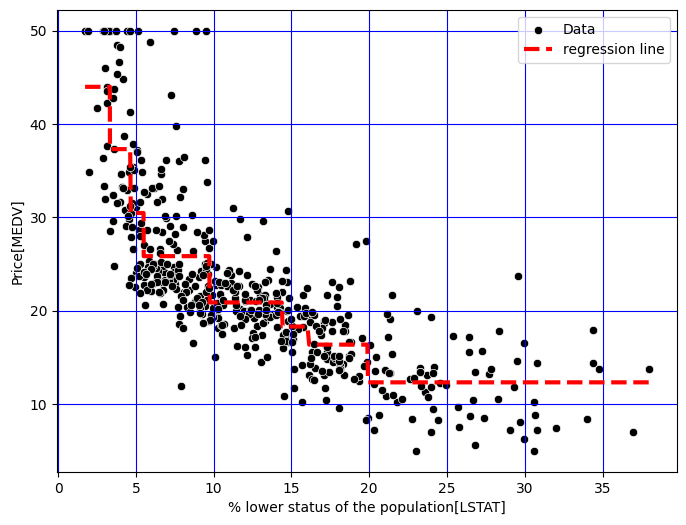

In [24]:
x = df[['LSTAT']].values 
y = df[['MEDV']].values 
tree = DecisionTreeRegressor(max_depth=3)

tree.fit(x,y)

sort_idx = x.flatten().argsort()
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(8,6))
sns.scatterplot(x=x.ravel(),y=y.ravel(),color='black',label="Data")
sns.lineplot(x=x[sort_idx].ravel(),y=tree.predict(x)[sort_idx].ravel(),linestyle='dashed',color='red',lw=3,label="regression line")
plt.xlabel("% lower status of the population[LSTAT]")
plt.ylabel("Price[MEDV]")
plt.grid(visible=True,color="blue")
plt.show()

In [31]:
# RANDOM FOREST REFRESSOR NON LINEARITY
from sklearn.model_selection import train_test_split as tt 
X = df.iloc[:,:-1].values
Y = df['MEDV'] 
xtrain,xtest,ytrain,ytest = tt(X,Y,test_size=0.2,random_state=42,shuffle=True)

from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error , r2_score
forest = RandomForestRegressor(n_estimators=1000,criterion='squared_error',random_state=1,n_jobs=-1)
forest.fit(xtrain,ytrain)
y_train_pred = forest.predict(xtrain)
y_pred = forest.predict(xtest)
print(f"MSE(Test) : {mean_squared_error(y_true=ytest,y_pred=y_pred)}")
print(f"MSE(Train) : {mean_squared_error(y_true=ytrain,y_pred=y_train_pred)}")
print(f"R2 Score(Train) : {r2_score(y_true=ytrain,y_pred=y_train_pred)}")
print(f"R2 Score(Test) : {r2_score(y_true=ytest,y_pred=y_pred)}")

MSE(Test) : 8.886045435882307
MSE(Train) : 1.8307978154950229
R2 Score(Train) : 0.9789256811093148
R2 Score(Test) : 0.8788273964203435


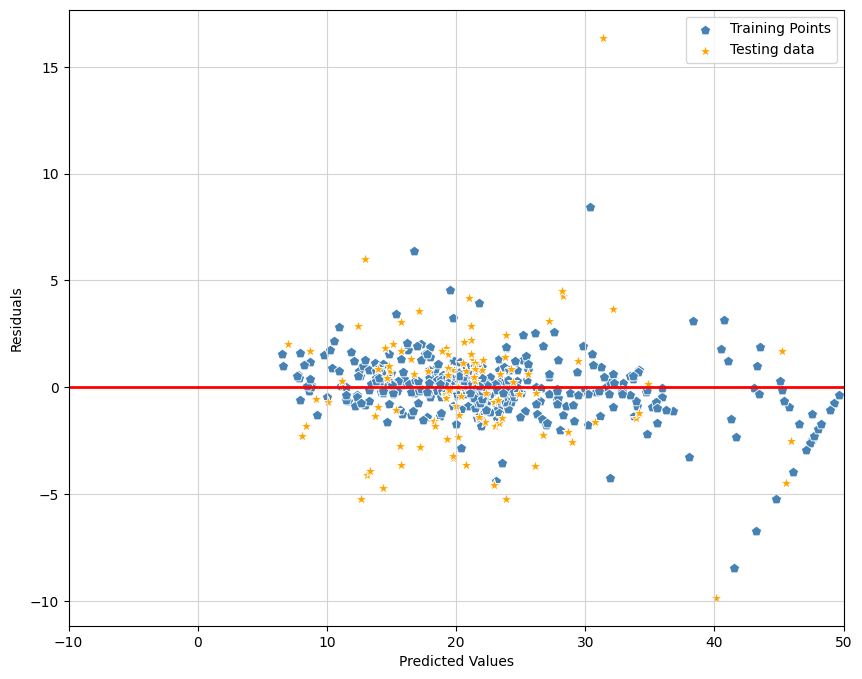

In [61]:
# Visualization 
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_train_pred.ravel(),y=(y_train_pred.ravel() - ytrain.ravel()),color="steelblue",label="Training Points",marker='p',edgecolor='white',alpha=1,s=60)
sns.scatterplot(x=y_pred.ravel(),y=(y_pred.ravel() - ytest.ravel()),label="Testing data",alpha=1,color="orange",marker='*',s=80)
plt.grid(color="lightgrey")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.xlim([-10,50])
plt.show()